In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Fix the path construction - use forward slashes or raw strings
import os

# Method 1: Use forward slashes (recommended)
path = os.path.abspath(os.path.join("..", "04_S&P500_quant_analysis", "01_data", "S&P500_D_1789-05-01_2025-09-17.csv"))

# Alternative Method 2: Use raw string
# path = os.path.abspath(os.path.join("..", r"04_S&P500_quant_analysis\01_data", "S&P500_D_1789-05-01_2025-09-17.csv"))

# Alternative Method 3: Use pathlib (modern approach)
# from pathlib import Path
# path = Path("..") / "04_S&P500_quant_analysis" / "01_data" / "S&P500_D_1789-05-01_2025-09-17.csv"

# print(f"Path exists: {os.path.exists(path)}")

# Read the CSV file
df = pd.read_csv(path)

# lower case column names for easier access
df.columns = [col.lower() for col in df.columns]

# Set the 'date' column as the index and convert it to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Show the first few rows of the dataframe
df.head()

,open,high,low,close,volume
date,,,,,
1789-05-01,0.51,0.51,0.51,0.51,0.0
1789-06-01,0.51,0.51,0.51,0.51,0.0
1789-07-01,0.50,0.50,0.50,0.50,0.0
1789-08-01,0.50,0.51,0.50,0.51,0.0
1789-09-01,0.51,0.51,0.50,0.51,0.0


In [6]:
# Calculate simple returns with pct_change()
df['simple_returns'] = df['close'].pct_change()

# Drop NA values that result from pct_change()
df.dropna(inplace=True)

# Show dataframe
df.head()

,open,high,low,close,volume,simple_returns
date,,,,,,
1789-06-01,0.51,0.51,0.51,0.51,0.0,0.000000
1789-07-01,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-01,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-01,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-01,0.51,0.51,0.51,0.51,0.0,0.000000


In [7]:
# resample to monthly frequency, taking the last observation of each month for OHLCV
monthly_ohlcv = df.resample('M').agg({
    'open': 'last',
    'high': 'last',
    'low': 'last',
    'close': 'last',
    'volume': 'last'
})

# simple_returns for monthly data
monthly_ohlcv['monthly_returns'] = monthly_ohlcv['close'].pct_change()

# Drop NA values that result from pct_change()
monthly_ohlcv.dropna(inplace=True)

# Show dataframe
monthly_ohlcv.head()

,open,high,low,close,volume,monthly_returns
date,,,,,,
1789-07-31,0.50,0.50,0.50,0.50,0.0,-0.019608
1789-08-31,0.50,0.51,0.50,0.51,0.0,0.020000
1789-09-30,0.51,0.51,0.50,0.51,0.0,0.000000
1789-10-31,0.51,0.51,0.51,0.51,0.0,0.000000
1789-11-30,0.51,0.51,0.50,0.50,0.0,-0.019608


In [8]:
# Calculate log returns (Monthly) for all data
log_returns = (1 + monthly_ohlcv['monthly_returns']).apply(np.log)

# Cumulative sum of log returns (correct for compounding)
cumsum_log = log_returns.cumsum()

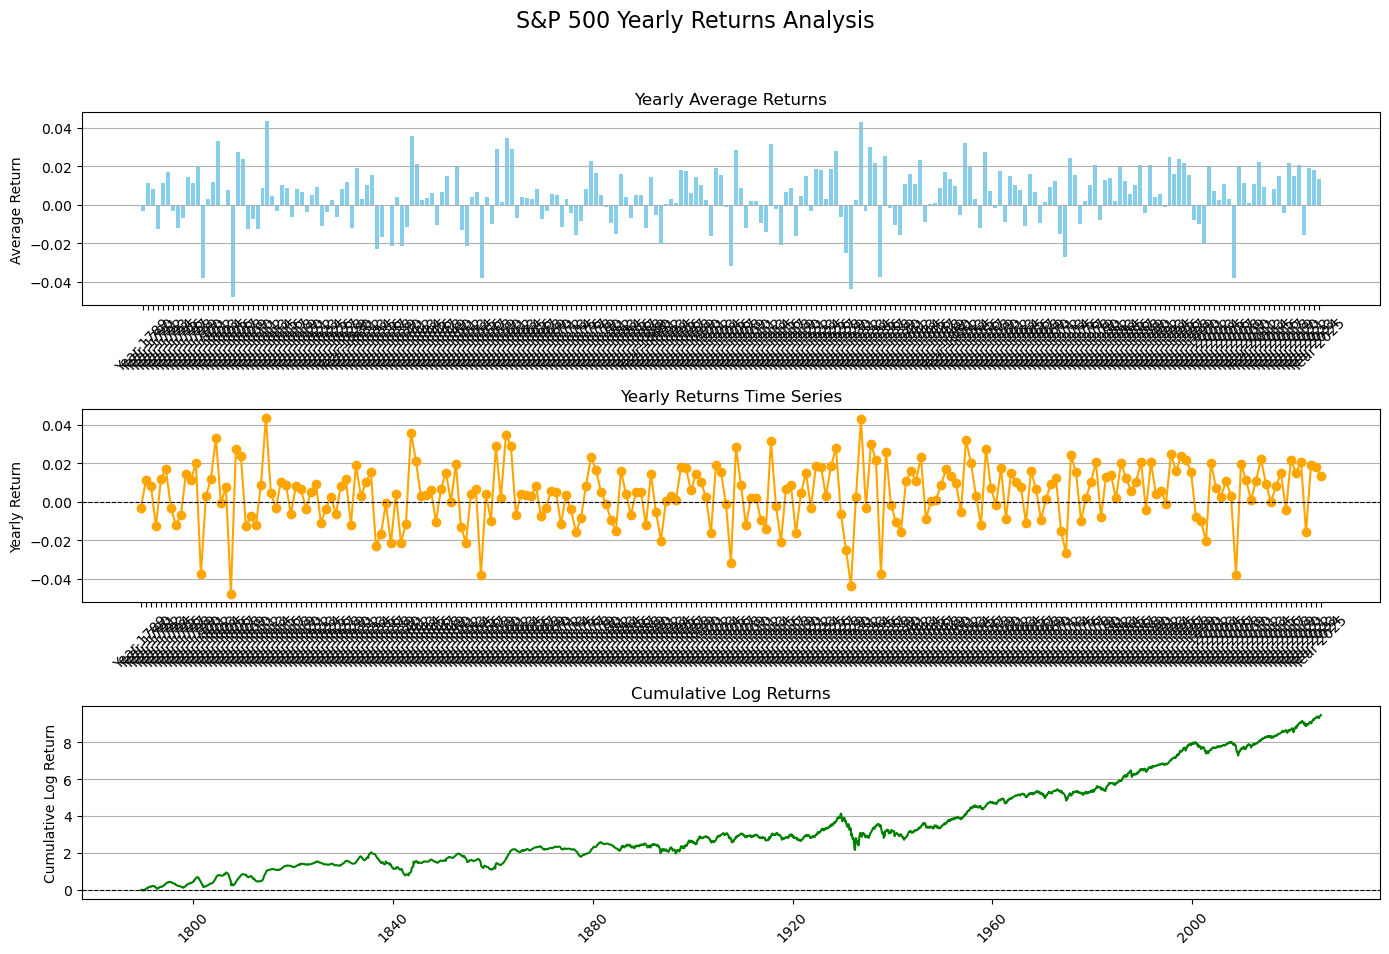

In [9]:
# group by year and calculate mean returns for each year
yearly_avg_returns = monthly_ohlcv['monthly_returns'].groupby(monthly_ohlcv.index.year).mean()
yearly_avg_returns.index = ['Year ' + str(year) for year in yearly_avg_returns.index]

# Plotting
plt.figure(figsize=(14, 10))
plt.suptitle('S&P 500 Yearly Returns Analysis', fontsize=16)
plt.subplots_adjust(hspace=0.4)
# Subplot 1: Yearly Average Returns
plt.subplot(3, 1, 1)
plt.bar(yearly_avg_returns.index, yearly_avg_returns.values, color='skyblue')
plt.title('Yearly Average Returns')
plt.ylabel('Average Return')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Subplot 2: Yearly Returns Time Series
plt.subplot(3, 1, 2)
plt.plot(yearly_avg_returns, marker='o', linestyle='-', color='orange')
plt.title('Yearly Returns Time Series')
plt.ylabel('Yearly Return')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Subplot 3: Cumulative Log Returns
plt.subplot(3, 1, 3)
plt.plot(cumsum_log, color='green')
plt.title('Cumulative Log Returns')
plt.ylabel('Cumulative Log Return')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [10]:
# Statistical Summary of Yearly Returns
mean_return = yearly_avg_returns.mean()
median_return = yearly_avg_returns.median()
std_dev_return = yearly_avg_returns.std()
max_return = yearly_avg_returns.max()
min_return = yearly_avg_returns.min()

print("Statistical Summary of Yearly Returns:")
print(f"Mean Return: {mean_return:.4f}")
print(f"Median Return: {median_return:.4f}")
print(f"Standard Deviation: {std_dev_return:.4f}")
print(f"Max Return: {max_return:.4f}")
print(f"Min Return: {min_return:.4f}")

# print statistical summary using describe, yearly returns
print("\nDetailed Statistical Summary:")
print(yearly_avg_returns.describe())

Statistical Summary of Yearly Returns:
Mean Return: 0.0042
Median Return: 0.0052
Standard Deviation: 0.0154
Max Return: 0.0435
Min Return: -0.0476

Detailed Statistical Summary:
count    237.000000
mean       0.004244
std        0.015355
min       -0.047640
25%       -0.005379
50%        0.005164
75%        0.015041
max        0.043538
Name: monthly_returns, dtype: float64
